<a href="https://colab.research.google.com/github/rahad-1309/ML_lab/blob/main/lab_7_exercise_dT%26RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [11]:
df = pd.read_csv("/content/kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [12]:
df.isnull().values.any()

False

In [13]:
x = df.drop(['Kyphosis'], axis = 1)
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [14]:
new_y = pd.get_dummies(df['Kyphosis'], drop_first = True)
new_y

,present
0,0
1,0
2,1
3,0
4,0
...,...
76,1
77,0
78,0
79,1


In [15]:
y = new_y
y

,present
0,0
1,0
2,1
3,0
4,0
...,...
76,1
77,0
78,0
79,1


In [16]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=1)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
predictions = dtc.predict(xtest)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.33      0.33      0.33         6

   micro avg       0.68      0.68      0.68        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.68      0.68      0.68        25



In [21]:
print(confusion_matrix(ytest,predictions))

[[15  4]
 [ 4  2]]


In [22]:
dtc.score(xtest,ytest)

0.68

In [24]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [27]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

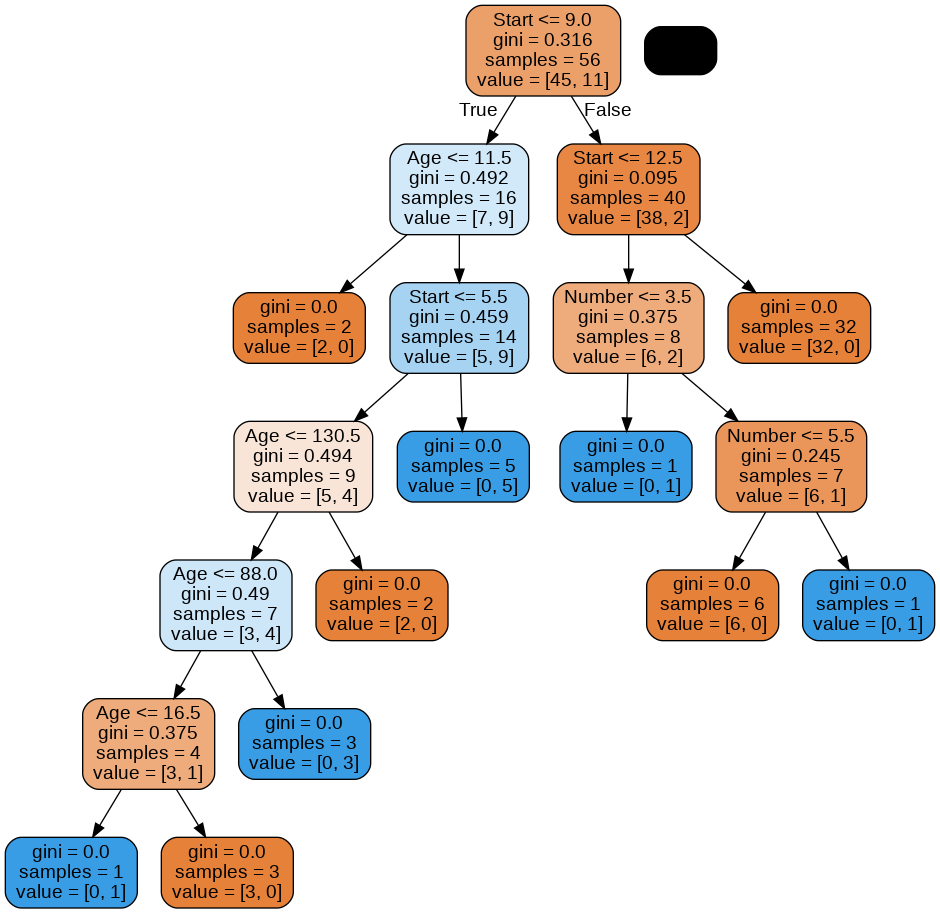

In [28]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [38]:
print(dtc.predict([[72,4,3]]))
print ("'0' Absent")
print ("'1' present")

[0]
'0' Absent
'1' present


In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/u

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
rfc_pred = rfc.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [33]:
print(confusion_matrix(ytest,rfc_pred))

[[17  2]
 [ 5  1]]


In [34]:
rfc.score(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.72

In [39]:
print(rfc.predict([[72,4,3]]))
print ("'0' Absent")
print ("'1' Present")

[0]
'0' Absent
'1' Present


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
